In [19]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [20]:
conn = sqlite3.connect("weather.db")

query = """
SELECT 
  substr(Date_Time, 1, 7) AS month, 
  AVG(Temperature_C) AS avg_temp
FROM weather
GROUP BY month
ORDER BY month;

"""

df = pd.read_sql_query(query, conn)
conn.close()


In [21]:
df.head()


,month,avg_temp
0,2024-01,14.446461
1,2024-02,14.502081
2,2024-03,15.005691
3,2024-04,15.001603
4,2024-05,15.042793


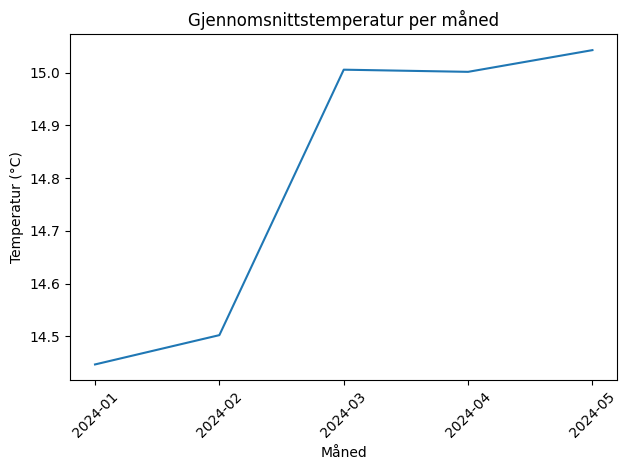

In [22]:
plt.plot(df['month'], df['avg_temp'])
plt.xticks(rotation=45)
plt.title("Gjennomsnittstemperatur per måned")
plt.xlabel("Måned")
plt.ylabel("Temperatur (°C)")
plt.tight_layout()
plt.show()

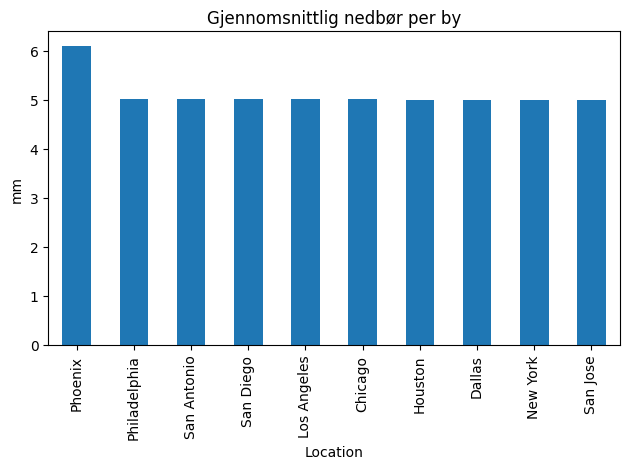

In [23]:
conn = sqlite3.connect("weather.db")
query = """
SELECT Location, AVG(Precipitation_mm) AS avg_precip
FROM weather
GROUP BY Location
ORDER BY avg_precip DESC;
"""
df = pd.read_sql_query(query, conn)

df.plot(kind="bar", x="Location", y="avg_precip", legend=False)
plt.title("Gjennomsnittlig nedbør per by")
plt.ylabel("mm")
plt.tight_layout()
plt.show()

conn.close()
#Viser gjennomsnittlig nedbør per by

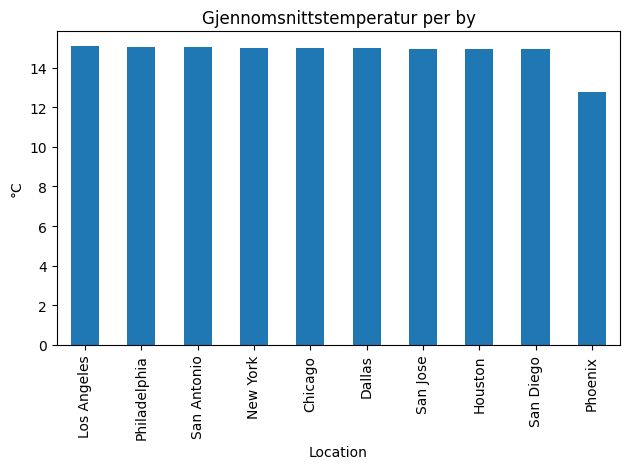

In [24]:
conn = sqlite3.connect("weather.db")

query = """
SELECT Location, AVG(Temperature_C) AS avg_temp
FROM weather
GROUP BY Location
ORDER BY avg_temp DESC;
"""

df = pd.read_sql_query(query, conn)
conn.close()

df.plot(kind="bar", x="Location", y="avg_temp", legend=False)
plt.title("Gjennomsnittstemperatur per by")
plt.ylabel("°C")
plt.tight_layout()
plt.show()
#Gjennomsnitttemperatur per by

,Location,max_temp,min_temp
0,New York,39.999801,-9.999870
1,San Diego,39.999692,-9.999986
2,Philadelphia,39.999642,-9.999282
3,Los Angeles,39.999592,-9.999913
4,San Jose,39.999015,-9.999966
5,Houston,39.998913,-9.999874
6,Phoenix,39.998889,-19.969311
7,Dallas,39.998804,-9.999588
8,Chicago,39.998561,-9.999959
9,San Antonio,39.998343,-9.999964


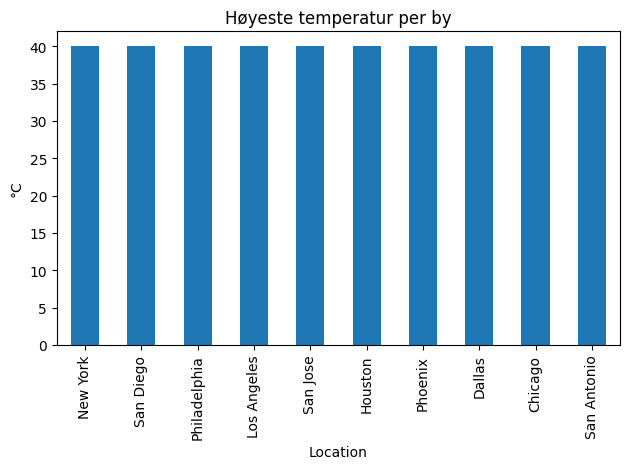

In [25]:
conn = sqlite3.connect("weather.db")

query = """
SELECT 
  Location, 
  MAX(Temperature_C) AS max_temp, 
  MIN(Temperature_C) AS min_temp
FROM weather
GROUP BY Location
ORDER BY max_temp DESC;
"""

df = pd.read_sql_query(query, conn)
conn.close()

# Vis som tabell
display(df)

df.plot(kind="bar", x="Location", y="max_temp", legend=False)
plt.title("Høyeste temperatur per by")
plt.ylabel("°C")
plt.tight_layout()
plt.show()
